In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
kobe_dataset = pd.read_csv('../data/02_intermediate/kobe_dataset.csv')
kobe_dataset

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693
30693,Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696


In [21]:
separador = '2PT Field Goal'
filter_2fg_partial = kobe_dataset[kobe_dataset['shot_type'] == separador]
filter_3fg_partial = kobe_dataset[kobe_dataset['shot_type'] != separador]

filter_2fg = filter_2fg_partial[['lat',
                                     'lon',
                                     'minutes_remaining',
                                     'period',
                                     'playoffs',
                                     'shot_distance',
                                     'shot_made_flag']]
filter_3fg = filter_3fg_partial[['lat',
                                     'lon',
                                     'minutes_remaining',
                                     'period',
                                     'playoffs',
                                     'shot_distance',
                                     'shot_made_flag']]

filtered_2fg = filter_2fg.dropna()
filtered_3fg = filter_3fg.dropna()

filtered_2fg.isna().any()

lat                  False
lon                  False
minutes_remaining    False
period               False
playoffs             False
shot_distance        False
shot_made_flag       False
dtype: bool

In [ ]:
X_without_scaler = filtered_2fg.drop('shot_made_flag', axis=1)
y = filtered_2fg[['shot_made_flag']]

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_without_scaler), columns = X_without_scaler.columns, index= X_without_scaler.index)


data_normalized = X.join(y)
data_normalized.isna().any()


In [84]:
data_train, data_test = train_test_split(data_normalized,
                                        test_size = 0.2, 
                                        random_state = 19,
                                        stratify = data_normalized['shot_made_flag'])

In [88]:
data_train.loc[data_train['shot_made_flag'] == 0]

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
11226,-0.232878,1.750661,-0.613407,-0.411069,-0.417991,1.029675,0.0
23766,-0.642634,0.712108,1.431116,-0.411069,-0.417991,0.235957,0.0
3312,-1.204151,-0.069484,-1.489631,-0.411069,-0.417991,0.500529,0.0
26307,0.100997,-0.476339,-0.321333,0.459887,2.392398,-0.557761,0.0
24673,0.586633,-1.675493,-0.321333,-1.282025,-0.417991,0.632816,0.0
...,...,...,...,...,...,...,...
17925,-2.478946,-0.155138,-0.029258,-1.282025,-0.417991,1.558820,0.0
20708,0.950860,0.230305,1.431116,-1.282025,-0.417991,-1.086906,0.0
16386,0.966036,-0.080190,-0.029258,1.330843,-0.417991,-1.351479,0.0
6322,0.783923,0.637161,1.139041,-0.411069,-0.417991,-0.557761,0.0


In [82]:
data_test

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
11758,-0.384640,-0.272912,-0.613407,0.459887,-0.417991,-0.160902,1.0
10119,-0.779219,1.236737,1.431116,-1.282025,-0.417991,0.765102,0.0
18742,0.541105,-0.358565,-0.321333,1.330843,-0.417991,-0.954620,0.0
23114,0.966036,-0.080190,-0.613407,1.330843,-0.417991,-1.351479,0.0
18728,0.298286,-0.037364,0.262817,-0.411069,-0.417991,-0.822334,0.0
...,...,...,...,...,...,...,...
9094,1.041917,1.397338,0.554892,0.459887,-0.417991,0.368243,0.0
4514,0.040292,-1.782561,-1.489631,-1.282025,-0.417991,0.897388,0.0
28899,0.131349,0.369492,0.846966,-1.282025,2.392398,-0.557761,0.0
5379,0.966036,-0.080190,1.723190,0.459887,-0.417991,-1.351479,1.0


In [3]:
data_train = pd.read_parquet('../data/04_feature/data_train.parquet')
data_test = pd.read_parquet('../data/04_feature/data_test.parquet')

In [18]:
data_train

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
11226,-0.232878,1.750661,-0.613407,-0.411069,-0.417991,1.029675,0.0
23766,-0.642634,0.712108,1.431116,-0.411069,-0.417991,0.235957,0.0
12925,0.708042,0.166064,-0.905482,0.459887,-0.417991,-1.086906,1.0
3312,-1.204151,-0.069484,-1.489631,-0.411069,-0.417991,0.500529,0.0
26307,0.100997,-0.476339,-0.321333,0.459887,2.392398,-0.557761,0.0
...,...,...,...,...,...,...,...
29065,-0.961333,1.418752,-1.489631,-0.411069,2.392398,1.029675,1.0
10677,-1.598731,-0.112311,-0.029258,1.330843,-0.417991,0.765102,1.0
16386,0.966036,-0.080190,-0.029258,1.330843,-0.417991,-1.351479,0.0
6322,0.783923,0.637161,1.139041,-0.411069,-0.417991,-0.557761,0.0


In [29]:
from pycaret.classification import *
from sklearn.metrics import log_loss

stp = setup(data = data_train, target= 'shot_made_flag', session_id= 19)
add_metric('logloss', 'Log loss', log_loss)

Name                                                  Log loss
Display Name                                          Log loss
Score Function       <function log_loss at 0x0000017FDBBE4280>
Scorer                                   make_scorer(log_loss)
Target                                                    pred
Args                                                        {}
Greater is Better                                         True
Multiclass                                                True
Custom                                                    True
Name: logloss, dtype: object

In [31]:
lr = create_model('lr', fold=10)

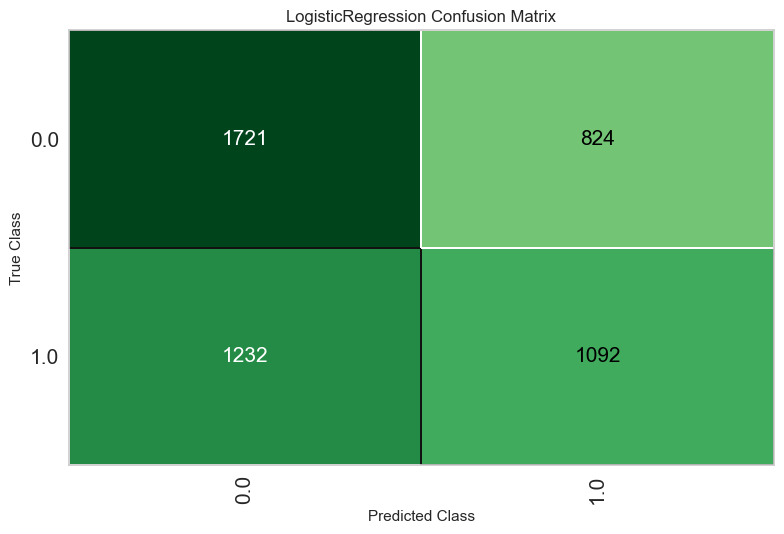

In [33]:
plot_model(lr, plot='confusion_matrix')